# Analysis of the performance of NBA players over the past 30 years

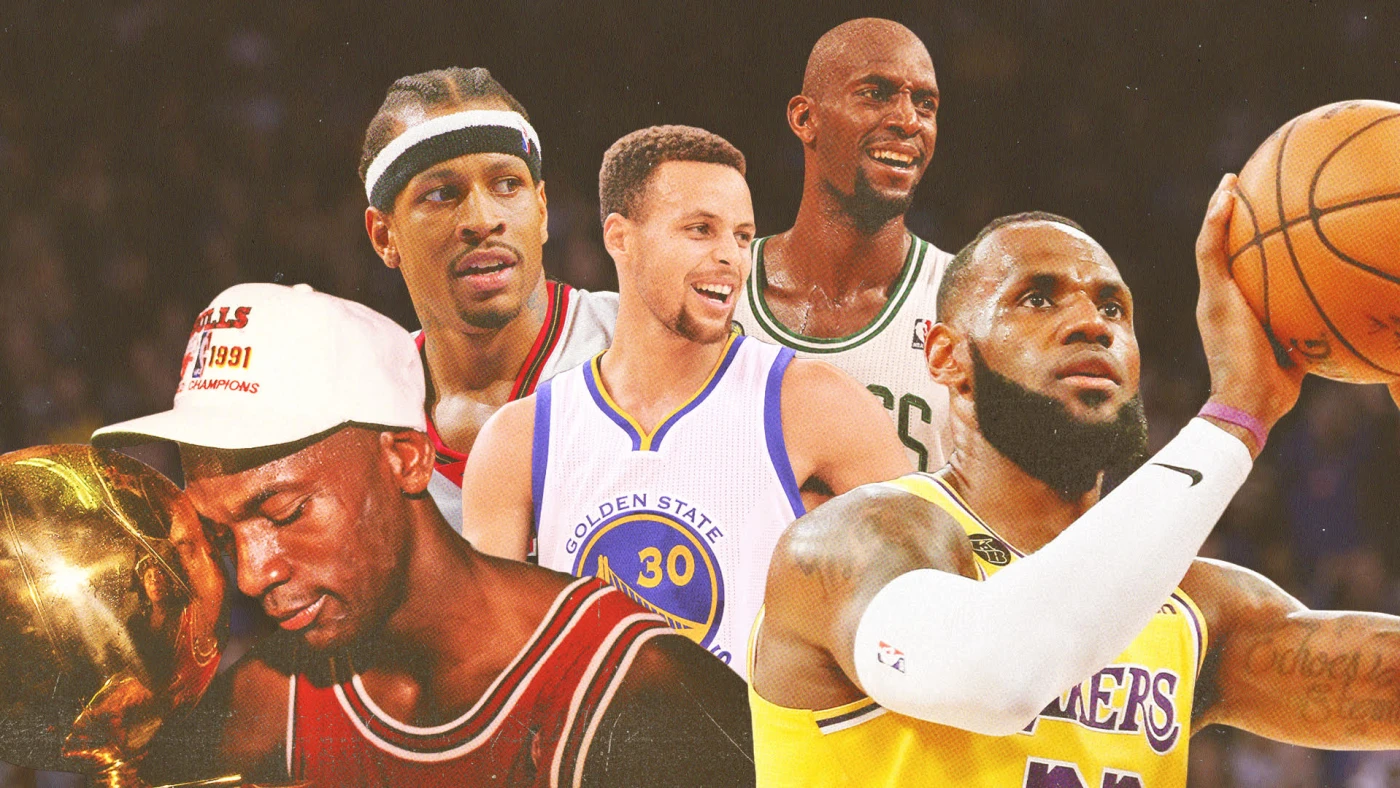

The main purpose of this project is to prove whether NBA player performance has improved over the past 30 years/season from the 1992 to the 2022 season which recently concluded. In order to answer the question proposed we'll ask ourselves the following questions along the way:

- Have points per player generally increased over time?
- What was the general trend of point distribution by player position?
- How does play position impact overall performance
- What do players excel at and has that changed over the last 30 years?

Basketball players are traditionally grouped into five distinct positions, but these designations are quickly becoming outdated. At the end of this project we will attempt to reclassify players into new groups based on personal performance in the NBA regular season over the last 30 seasons.

## Reading in the data

In [1]:
import pandas as pd

In [2]:
nba_data = pd.read_csv('nba_player_stats_1992-2022_cleaned.csv')

In [3]:
del nba_data['Unnamed: 0']

In [4]:
nba_data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,A.C. Green,PF,28,LAL,82,53,2902,382,803,0.476,...,306,456,762,117,91,36,111,141,1116,1992
1,A.C. Green,PF,29,LAL,82,55,2819,379,706,0.537,...,287,424,711,116,88,39,116,149,1051,1993
2,A.C. Green,PF,30,PHO,82,55,2825,465,926,0.502,...,275,478,753,137,70,38,100,142,1204,1994
3,A.C. Green,SF,31,PHO,82,52,2687,311,617,0.504,...,194,475,669,127,55,31,114,146,916,1995
4,A.C. Green,SF,32,PHO,82,36,2113,215,444,0.484,...,166,388,554,72,45,23,79,141,612,1996


In [5]:
nba_data.shape #Matches the cleaned data set; jst checking

(14312, 30)

# Data Exploration

In [6]:
#statistical summary of numerical columns in nba_data

nba_data.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
count,14312.000000,14312.000000,14312.000000,14312.000000,14312.000000,14312.000000,14254.000000,14312.000000,14312.000000,12284.000000,...,14312.000000,14312.000000,14312.000000,14312.000000,14312.000000,14312.000000,14312.000000,14312.000000,14312.000000,14312.000000
mean,26.706191,52.036473,25.323016,1224.152599,191.033538,419.256568,0.438071,34.577557,97.202627,0.278153,...,58.692566,156.797582,215.490148,113.609279,39.499581,25.122904,71.651272,108.236235,510.272638,2007.812814
std,4.256777,25.183601,28.884654,903.922551,173.967949,371.253401,0.095010,48.247958,127.524825,0.160535,...,62.979526,142.837685,198.977628,134.393139,35.661343,34.725248,63.517736,74.828946,471.530876,8.998403
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1992.000000
25%,23.000000,32.000000,1.000000,384.000000,44.000000,105.000000,0.400000,0.000000,2.000000,0.200000,...,13.000000,42.000000,59.000000,19.000000,10.000000,4.000000,20.000000,42.000000,117.000000,2000.000000
50%,26.000000,58.000000,11.000000,1133.000000,147.000000,328.000000,0.440000,10.000000,34.000000,0.323000,...,36.000000,124.000000,166.000000,67.000000,31.000000,13.000000,56.000000,105.000000,387.000000,2008.000000
75%,30.000000,74.000000,50.000000,1944.000000,292.000000,642.000000,0.482000,55.000000,158.000000,0.373000,...,83.000000,226.000000,310.000000,156.000000,59.000000,31.000000,107.000000,164.000000,780.000000,2016.000000
max,44.000000,85.000000,83.000000,3533.000000,992.000000,2173.000000,1.000000,402.000000,1028.000000,1.000000,...,523.000000,1007.000000,1530.000000,1126.000000,244.000000,342.000000,464.000000,371.000000,2832.000000,2022.000000


In [7]:
#Checking for duplicates in Player data

nba_data.duplicated().any()

False

In [8]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14312 entries, 0 to 14311
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  14312 non-null  object 
 1   Pos     14312 non-null  object 
 2   Age     14312 non-null  int64  
 3   Tm      14312 non-null  object 
 4   G       14312 non-null  int64  
 5   GS      14312 non-null  int64  
 6   MP      14312 non-null  int64  
 7   FG      14312 non-null  int64  
 8   FGA     14312 non-null  int64  
 9   FG%     14254 non-null  float64
 10  3P      14312 non-null  int64  
 11  3PA     14312 non-null  int64  
 12  3P%     12284 non-null  float64
 13  2P      14312 non-null  int64  
 14  2PA     14312 non-null  int64  
 15  2P%     14213 non-null  float64
 16  eFG%    14254 non-null  float64
 17  FT      14312 non-null  int64  
 18  FTA     14312 non-null  int64  
 19  FT%     13796 non-null  float64
 20  ORB     14312 non-null  int64  
 21  DRB     14312 non-null  int64  
 22

In [9]:
total = nba_data.isnull().sum().sort_values(ascending = False)
percent = (nba_data.isnull().sum()/nba_data.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])

,Total Missing,Percent Missing
3P%,2028,14.17
FT%,516,3.61
2P%,99,0.69
eFG%,58,0.41
FG%,58,0.41
PTS,0,0.00
PF,0,0.00
TOV,0,0.00
BLK,0,0.00
STL,0,0.00


The data does have missing values, which culd be due to unavailabilty of some statistics in older data. Also, in a season, a player may have not attempted any 3-point shots and therefore did not make any 3-point shots. Same holds true for 2-point shots/attempted 2-point shots as well as Free Throws

<AxesSubplot:>

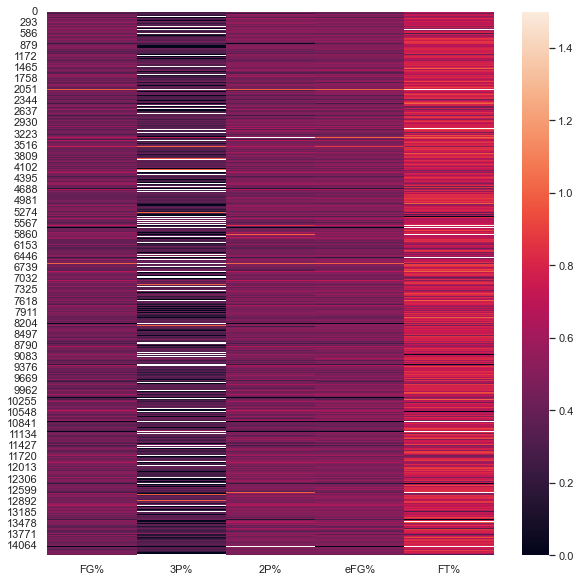

In [10]:
#Visualizing columns with missing values
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,10)) 
missing_col = [col for col in nba_data.columns if nba_data[col].isna().any()]
sns.heatmap(nba_data[missing_col], color = '0.2', ax=ax)

The heatmap serves as visual confirmation for what I believed to be true regarding some player stats

# Player Performance Metrics

**Variables that are indicative of performance:**

1. 'PTS' : Points Scored
2. 'FG' : Field Goals Made
3. 'FGA' : Field Goals Attempted
4. 'FG%' : Field Goals %
5. '3P' : 3-Point Field Goals Made
6. '3PA' : 3-Point Field Goals Attempted
7. '3P%' : 3-Point Field Goals %
8. '2P' : 2-Point Field Goals Made
9. '2PA' : 2-Point Field Goals Attempted
10. '2P%' : 2-Point Field Goals %
11. 'FT' : Free Throws Made
12. 'FTA' : Free Throws Attempted
13. 'FT%' : Free Throws %
14. 'ORB' : Offensive Rebounds
15. 'DRB' : Defensive Rebounds
16. 'AST' : Assists
17. 'STL' : Steals
18. 'BLK' : Blocks

In [11]:
nba_year = nba_data.groupby(by=nba_data['Year'], axis=0).mean().round(2)

In [12]:
nba_year

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Year,,,,,,,,,,,,,,,,,,,,,
1992,26.87,58.12,28.68,1386.81,236.71,501.01,0.45,14.47,43.78,0.22,...,0.73,82.35,168.12,250.47,140.39,49.56,31.65,86.64,127.53,604.03
1993,26.97,57.72,28.38,1372.21,230.91,487.94,0.46,17.10,50.83,0.22,...,0.72,78.30,166.58,244.88,140.27,48.54,29.64,87.57,131.46,597.62
1994,26.96,55.98,27.47,1324.59,216.04,463.90,0.45,18.12,54.36,0.24,...,0.71,76.15,160.06,236.21,134.00,48.76,28.73,84.89,121.77,557.66
1995,27.34,55.11,27.33,1317.42,206.97,444.16,0.44,30.00,83.65,0.27,...,0.72,70.84,155.00,225.84,127.51,45.09,28.10,83.94,127.62,552.59
1996,27.29,55.84,27.78,1342.36,205.82,445.48,0.45,32.71,89.15,0.28,...,0.71,70.13,159.06,229.19,126.04,44.28,28.13,84.75,128.04,552.83
1997,27.57,53.87,26.96,1304.24,194.51,427.65,0.43,32.61,90.57,0.28,...,0.71,68.30,153.25,221.55,118.88,44.19,26.47,81.13,119.28,522.52
1998,27.66,54.67,27.08,1310.07,194.49,431.75,0.43,23.80,68.86,0.25,...,0.71,70.69,154.36,225.05,119.33,45.43,27.48,80.38,121.36,517.70
1999,27.57,33.91,16.48,796.93,112.61,257.68,0.42,14.69,43.36,0.25,...,0.71,41.48,95.78,137.26,68.30,27.53,16.35,48.28,73.20,301.80
2000,27.67,55.35,27.08,1308.13,199.52,444.69,0.43,26.23,74.29,0.26,...,0.73,67.26,165.23,232.49,121.03,42.98,28.00,80.57,126.21,527.99


In [13]:
nba_year.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,26.751935,52.374194,25.529032,1234.111613,192.289355,421.954516,0.437742,33.673226,94.727742,0.273871,...,0.724516,59.672258,157.270645,216.943871,114.419677,39.928065,25.388710,72.488065,109.537419,513.061935
std,0.592489,5.578191,3.033788,146.739923,23.016404,47.186020,0.010555,10.729131,29.068779,0.023899,...,0.011500,11.402441,15.536748,23.918795,14.057679,5.515840,3.468583,10.476276,16.769759,57.545657
min,25.560000,33.910000,16.480000,796.930000,112.610000,257.680000,0.420000,14.470000,43.360000,0.220000,...,0.710000,39.320000,95.780000,137.260000,68.300000,27.530000,16.350000,48.280000,73.200000,301.800000
25%,26.485000,53.065000,25.155000,1216.405000,189.475000,421.050000,0.430000,27.215000,77.925000,0.260000,...,0.720000,52.570000,154.680000,217.750000,111.745000,38.590000,23.995000,68.120000,100.895000,506.860000
50%,26.680000,54.400000,26.900000,1300.800000,195.340000,431.750000,0.440000,32.610000,90.570000,0.270000,...,0.720000,60.980000,162.010000,225.050000,116.460000,40.180000,26.470000,73.970000,115.400000,521.050000
75%,27.145000,55.460000,27.325000,1317.895000,203.085000,444.800000,0.445000,39.460000,111.215000,0.290000,...,0.730000,67.105000,166.225000,229.230000,119.105000,43.550000,27.935000,79.830000,121.110000,543.675000
max,27.670000,58.120000,28.680000,1386.810000,236.710000,501.010000,0.460000,52.750000,148.570000,0.310000,...,0.750000,82.350000,172.310000,250.470000,140.390000,49.560000,31.650000,87.570000,131.460000,604.030000


## Year by year Analysis

Now that we've grouped season NBA season by year and taken a general average we can now conduct some general explatory data analysis of all players in each season the pasy 30 years

### PTS (Points Scored)

In [14]:
nba_year['PTS'].describe()

count     31.000000
mean     513.061935
std       57.545657
min      301.800000
25%      506.860000
50%      521.050000
75%      543.675000
max      604.030000
Name: PTS, dtype: float64

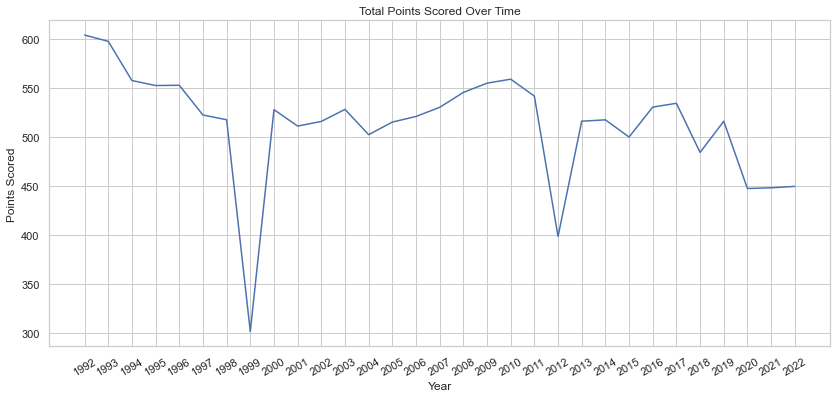

In [15]:
plt.figure(figsize=(14,6))
plt.plot(nba_year.index, nba_year['PTS'])
plt.xlabel('Year')
plt.ylabel('Points Scored')
plt.title('Total Points Scored Over Time')
plt.xticks(nba_year.index, rotation = 30)
plt.show()

We can see that from the 1991-92 season there has been a gradual decline of points scored each season with two notceable troughs in the 1998–99 NBA season as well as the the 2011-12 NBA season. In the last 3 years it seems to have averaged out.

The two extreme troughs we seen in the last 30 seasons can be explained by **NBA Lockout**. A lockout occurs when the NBA and NBA Players Association have failed to reach an agreement.

Now what does it mean to be in a lockout? Well, players and team officials, including coaches, owners, staff, are not permitted to talk to their players.  No one gets their paycheck, and every players' contract has temporarily expires until the new CBA (collective bargaining agreement) is signed. This effectively means the season is put on hold until a CBA is reached. The result is that less games are played and therefore less points are scored.

### 3-Point Shots vs 2-Point Shots (3P vs 2P)

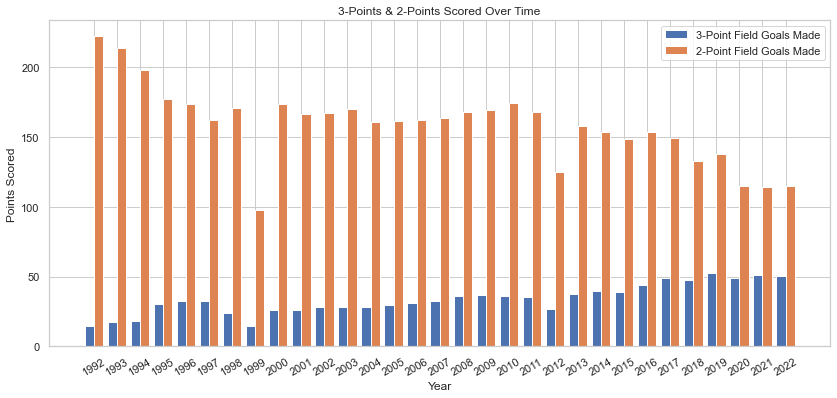

In [16]:
plt.figure(figsize=(14,6))
X_axis = nba_year.index
  
plt.bar(X_axis - 0.2, nba_year['3P'], 0.4, label ='3-Point Field Goals Made')
plt.bar(X_axis + 0.2, nba_year['2P'], 0.4, label ='2-Point Field Goals Made')

plt.xlabel('Year')
plt.ylabel('Points Scored')
plt.xticks(nba_year.index, rotation = 30)
plt.title('3-Points & 2-Points Scored Over Time')
plt.legend()
plt.show()

Over time the 2-Point shots made in the league, which seems to have peaked in the 1991-92 season, has decreased overtime whilst 3-Point shots have simultaneously saw increases in overtime with it peaking in the 2019 season. 

The more talented/skilled players in the NBA become, the higher the 3-Point Shots made will increase. With the likes of indivduals like Stephen Curry who have completed dominated in the recent NBA 2021-22 Season by utiliting the 3P shot to do, it is almost inevitable that the 3P shot made will increase  over time.

### Offensive Rebounds vs Defensive Rebounds (ORB vs DRB)

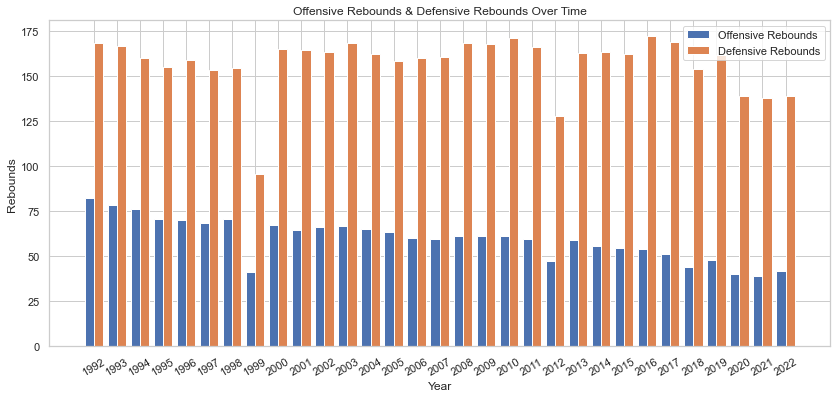

In [17]:
plt.figure(figsize=(14,6))
X_axis = nba_year.index
  
plt.bar(X_axis - 0.2, nba_year['ORB'], 0.4, label ='Offensive Rebounds')
plt.bar(X_axis + 0.2, nba_year['DRB'], 0.4, label ='Defensive Rebounds')

plt.xlabel('Year')
plt.ylabel('Rebounds')
plt.xticks(nba_year.index, rotation = 30)
plt.title('Offensive Rebounds & Defensive Rebounds Over Time')
plt.legend()
plt.show()

It seems that Defensive Rebounds have been mainted over the last 30 seaons, however there has been a deceline in offensive rebounds. The reason this may occur is because defensive rebounds may be harder to achieve in the 'transition state' of the NBA today.

The defense is in a better position to rebound because they are guarding the basket, they also can focus on it more because they are not worried about scoring while on defense. Nor are they quite as worried about getting back to the other end of the court, most offenses will keep at least two players back to guard against fast breaks, so that the rebounding may be three on five at best. 

To put simply, achieving a offensive rebounds requires more resources to achieve than a defensive rebound, which may explain why they have decreased over time.

### (eFG%) Effective field goal percentage

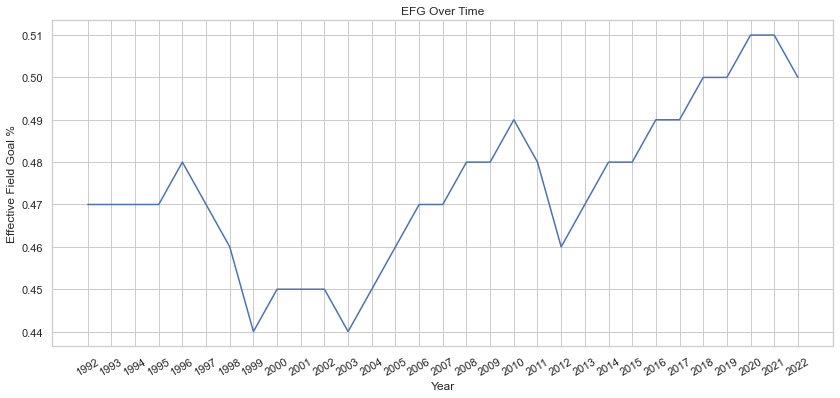

In [18]:
plt.figure(figsize=(14,6))
plt.plot(nba_year.index, nba_year['eFG%'])
plt.xlabel('Year')
plt.ylabel('Effective Field Goal %')
plt.title('EFG Over Time')
plt.xticks(nba_year.index, rotation = 30)
plt.show()

The effective field goal percentage (eFG%) is a statistic that adjusts field goal percentage to account for the fact that three-point field goals count for three points while field goals only count for two points. Its goal is to show what field goal percentage a two-point shooter would have to shoot at to match the output of a player who also shoots three-pointers

Despite the fact that we've seen a general decrease in 2-point shots over time, the eFG% has increased overtime, an occurence we would've expected to occur.

This could be used to argue that the 3-point shot has increased in potential value as opposed to the 2-point shot which dominated the league in the early 90s and 00s.

With that being said, lets explore how correlated out data points are with each other.

Text(0.5, 1.0, 'Correlation Heatmap of NBA Statistics')

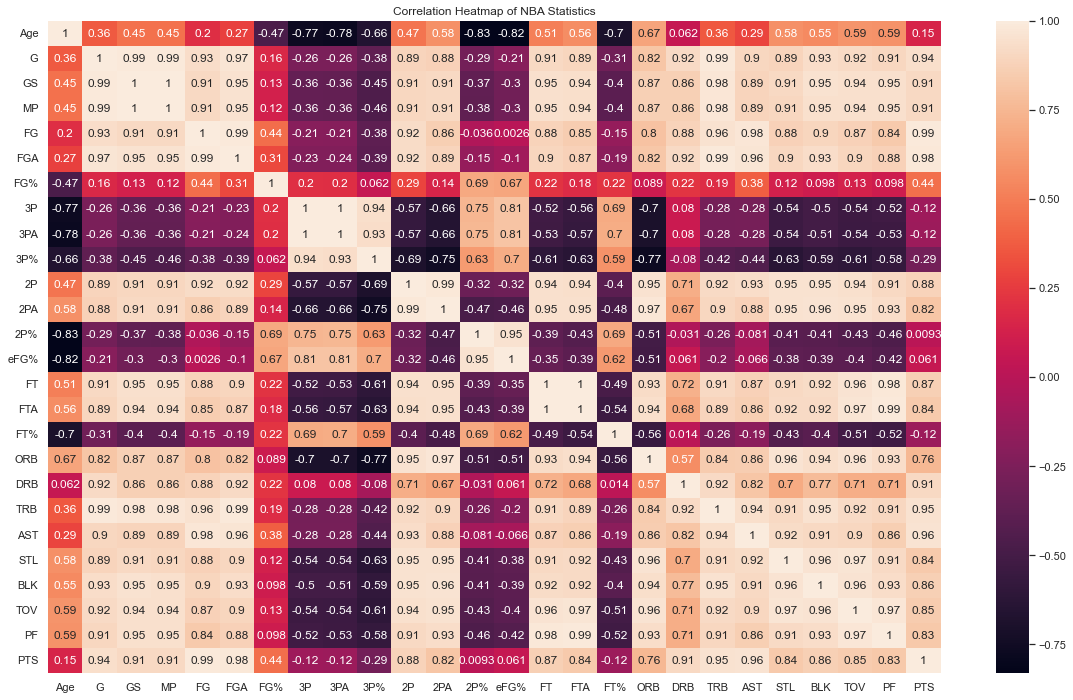

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(nba_year.corr(), annot=True)
plt.title('Correlation Heatmap of NBA Statistics')

In [20]:
pts_corr= nba_year.corr()[['PTS']]
pts_corr = pts_corr['PTS'].sort_values(ascending=False)
pts_corr = pd.Series(data=pts_corr)
pts_corr

PTS     1.000000
FG      0.991870
FGA     0.981571
AST     0.958758
TRB     0.952115
G       0.937278
GS      0.911636
DRB     0.911129
MP      0.910128
2P      0.880283
FT      0.869469
BLK     0.864431
TOV     0.848704
STL     0.839192
FTA     0.838693
PF      0.832401
2PA     0.816450
ORB     0.755652
FG%     0.444023
Age     0.147350
eFG%    0.061267
2P%     0.009349
3P     -0.115538
FT%    -0.118998
3PA    -0.119340
3P%    -0.289841
Name: PTS, dtype: float64

In [21]:
high_corr = pts_corr[pts_corr >= 0.9]
high_corr

PTS    1.000000
FG     0.991870
FGA    0.981571
AST    0.958758
TRB    0.952115
G      0.937278
GS     0.911636
DRB    0.911129
MP     0.910128
Name: PTS, dtype: float64

The key drivers behind the change in `PTS` are the `FG`, `FGA`, `AST` and `TRB`. Since they have near `1` correlation.

Lets take a look at variables that have negative correlation with `PTS` to see if we can uncover any interesting trends

In [22]:
low_corr = pts_corr[pts_corr < 0.0]
low_corr

3P    -0.115538
FT%   -0.118998
3PA   -0.119340
3P%   -0.289841
Name: PTS, dtype: float64

# NBA Player Performance by Position

In Basketball, every player has a role on court. Each team has 5 players on the court at any given time. And each player often has a unique skillset to help their team win. Five distinct positions on court are

- **Power Forward**: Strong inside presence; scores close and mid-range shots.
- **Center**: Scores near the basket with strong rebounding and blocking
- **Shooting Guard**: Positions on the wing with strong 3-point shooting ability.
- **Point Guard**: Initiates offensive plays with great passing and dribbling skills.
- **Small Forward**: Versatile shooter who can drive to the basket.


However, many times these roles and responsibilities overlap. Oftentimes, positions on different teams will serve different functions based on the type of player they are and the system that they are in. As a result, it can often be difficult to know what each position should be doing.

It has been increasingly apparent, however, that modern National Basketball Association (NBA) players adopt playstyles that do not quite fit into one of these five positions.For example, many point guards and shooting guards have strong driving skills, and many taller power forwards and centers have great long-range shooting ability

In [23]:
nba_data['Pos'].value_counts()

PF       2936
C        2886
SG       2883
PG       2760
SF       2608
SF-SG      35
SG-SF      32
PG-SG      31
SG-PG      30
C-PF       29
PF-SF      28
PF-C       27
SF-PF      21
SG-PF       4
SF-C        1
PG-SF       1
Name: Pos, dtype: int64

In [24]:
positions = pd.Series(nba_data['Pos'].value_counts().index[:5])

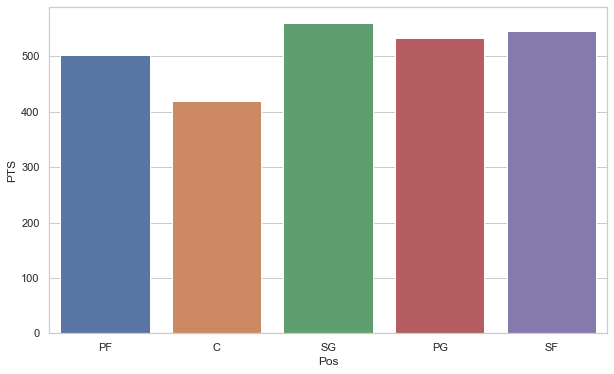

In [25]:
nba_position = nba_data.groupby(by=nba_data['Pos'], axis=0).mean().round(2)
nba_position = nba_position.loc[positions]
del nba_position['Year']
nba_position

plt.figure(figsize=(10,6))
ax = sns.barplot(x=nba_position.index, y="PTS", data=nba_position)

In [26]:
nba_2022 = nba_data[nba_data['Year'] == 2022].copy()
nba_1992 = nba_data[nba_data['Year'] == 1992].copy()
nba_comp = pd.concat([nba_2022, nba_1992])
nba_comp = nba_comp[nba_comp['Pos'].isin(['PF', 'C', 'SG', 'PG', 'SF'])]

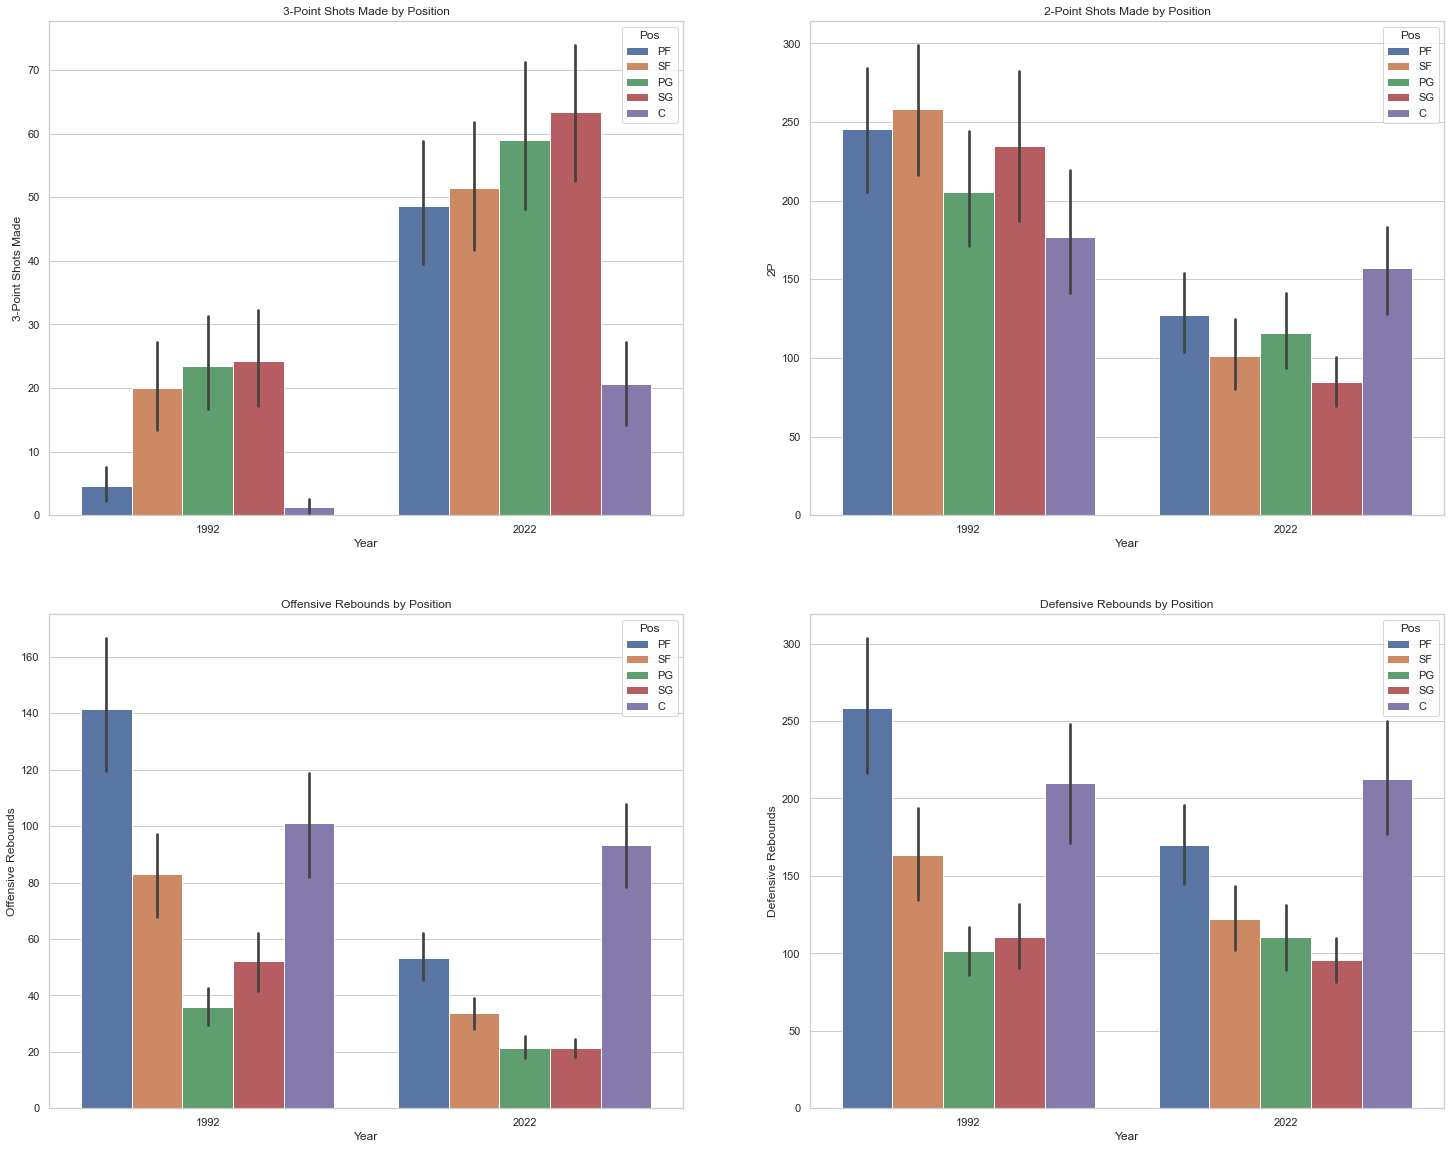

In [27]:
# Created subplots of the low correlation stats
plt.figure(figsize=(25, 20))

plt.subplot(2, 2, 1)
ax = sns.barplot(x='Year', y="3P", hue='Pos', data=nba_comp)
plt.xlabel('Year')
plt.ylabel('3-Point Shots Made')
plt.title('3-Point Shots Made by Position')

plt.subplot(2, 2, 2)
ax = sns.barplot(x='Year', y="2P",hue='Pos', data=nba_comp)
plt.xlabel('Year')
plt.title('2-Point Shots Made by Position')

plt.subplot(2, 2, 3)
ax = sns.barplot(x='Year', y="ORB", hue='Pos',data=nba_comp)
plt.xlabel('Year')
plt.ylabel('Offensive Rebounds')
plt.title('Offensive Rebounds by Position')

plt.subplot(2, 2, 4)
ax = sns.barplot(x='Year', y="DRB", hue='Pos',data=nba_comp)
plt.xlabel('Year')
plt.ylabel('Defensive Rebounds')
plt.title('Defensive Rebounds by Position')

plt.show()

**Power Forward**: The PF excels at maintaining a strong inside presence on the field and for the most part dominated when it comes to scoring 2-Pointers. As the position also requires the player to play upclose (the paint or even within the 3-Point perimeter), it make sense for them to make the execute a majority offensive and defensive rebounds on the field. Despite their strengths, they have poor 3-Point scorings.

**Center**: The Center much lke the PF has maintain it's position performance on the field for the most part. However, Centers in today's league shoot much more 3-Pointers compared to the 1992 season. Previously, we did establish that much more players on average in today's NBA shoot more threes so this shouldn't come as a surprise.


**Shooting Guard**: We can see that Shooting Guards have seen a drastic increase in 3-Point shots taken in the last 30 seasons. Since they play mainly on the wings, players over time have excelled at this. However, in comparison to players in the 1992 league, SG's today have weaker 2-Point shooting which is compensating by their improved 3-Point shooting


**Point Guard**: PG's overtime have maintained their role on the field for the most part. As more skilled PG's entered the game, their ability to shot create seems to have excelled explaining the increase in 3-Point shots made today comapred to 30 seasons ago.

**Small Forward**: Small forwards are seen as versatile shooters who can drive to the basket, however despite this, the seem to have neglected their ability to drive into the paint to score 2-pointers in favour of the 3-point shot. Looking at other performance stats, SF's seem to have seen decreases in other stats over time.



In [28]:
main_5 = nba_data[nba_data['Pos'].isin(['PF', 'C', 'SG', 'PG', 'SF'])].copy()
main_5['Pos'].value_counts()

PF    2936
C     2886
SG    2883
PG    2760
SF    2608
Name: Pos, dtype: int64

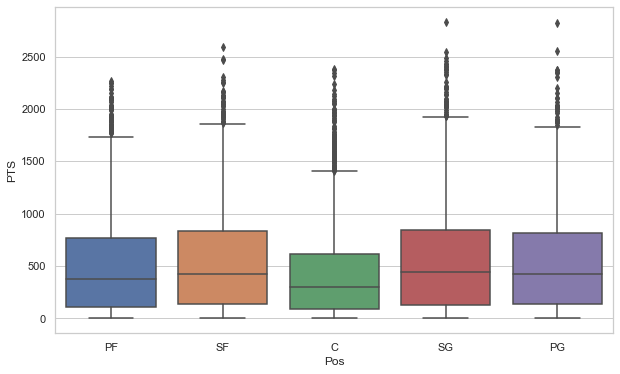

In [29]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=main_5['Pos'], y="PTS", data=main_5)

## Clustering NBA Players by performance

In [30]:
nba_data_trans = nba_data.select_dtypes('number').fillna(0).copy()
nba_data_trans

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,28,82,53,2902,382,803,0.476,12,56,0.214,...,306,456,762,117,91,36,111,141,1116,1992
1,29,82,55,2819,379,706,0.537,16,46,0.348,...,287,424,711,116,88,39,116,149,1051,1993
2,30,82,55,2825,465,926,0.502,8,35,0.229,...,275,478,753,137,70,38,100,142,1204,1994
3,31,82,52,2687,311,617,0.504,43,127,0.339,...,194,475,669,127,55,31,114,146,916,1995
4,32,82,36,2113,215,444,0.484,14,52,0.269,...,166,388,554,72,45,23,79,141,612,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14307,29,74,4,1179,189,374,0.505,0,0,0.000,...,84,206,290,38,28,73,84,192,513,2002
14308,30,30,12,488,80,145,0.552,0,0,0.000,...,27,65,92,9,6,17,29,79,198,2003
14309,31,24,2,273,34,77,0.442,0,0,0.000,...,23,35,58,6,5,11,17,52,91,2004
14310,32,58,2,928,133,234,0.568,0,0,0.000,...,49,135,184,26,13,40,49,130,339,2005


## Principal component analysis (PCA)

In [31]:
from sklearn.decomposition import PCA
feats = ['PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 
             'FTA', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK']

X = nba_data_trans[feats]
pca = PCA(n_components=2)
pca.fit(X)
components = pca.transform(X)
pca_df = pd.DataFrame({'component_1': components[:,0], 'component_2': components[:,1]})

# adding Pos column
pos = main_5['Pos']
c12 = pd.concat([pca_df, pos], axis = 1)
c12.rename(columns = {c12.columns[2]:'Pos'}, inplace=True)
c12.head()

,component_1,component_2,Pos
0,972.486572,-292.580712,PF
1,817.921632,-260.592143,PF
2,1159.338083,-330.966376,PF
3,589.580592,-130.943938,SF
4,177.198678,-173.759096,SF


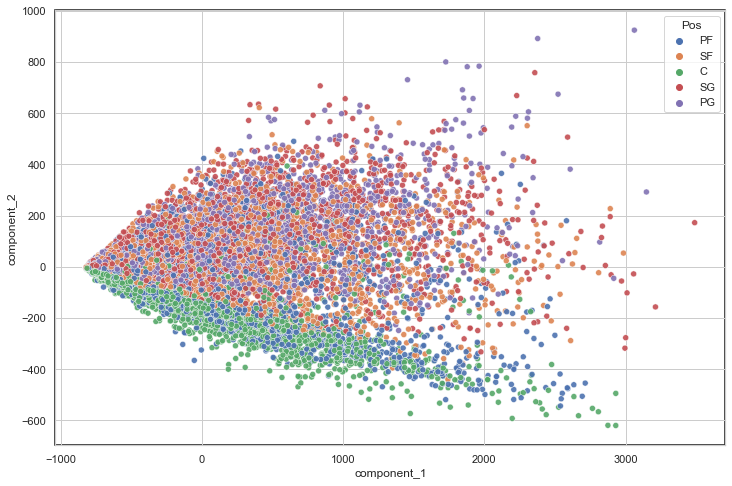

In [32]:
plt.figure(figsize = [12, 8])
ax = sns.scatterplot(x= c12['component_1'], y=c12['component_2'], hue=c12['Pos'],data=c12, alpha = 0.9)
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5) 

In [33]:
#Testing data for clustering tendency

from pyclustertend import hopkins ## the hopkins test
X = nba_data_trans[feats]
1 - hopkins(X.values, X.shape[0])

0.9483677037347014

In [34]:
#scaling the features

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
nba_data_trans[feats] = ss.fit_transform(nba_data_trans[feats])
nba_data_trans.shape

(14312, 27)

In [35]:
#model with k=5

from sklearn.cluster import KMeans
X = nba_data_trans[feats]
kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter = 1000, random_state = 25)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=4, random_state=25)

In [36]:
#assign the label
nba_data_trans['kmeans_id'] = kmeans.labels_

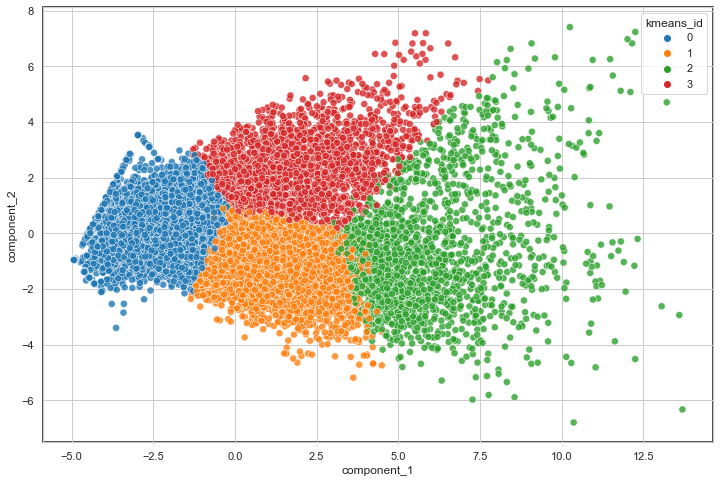

In [37]:
#applying PCA again

X = nba_data_trans[feats]
pca = PCA(n_components=2)
pca.fit(X)
components = pca.transform(X)
pca_df = pd.DataFrame({'component_1': components[:,0], 'component_2': components[:,1]})
pca_df['kmeans_id'] = kmeans.labels_
pca_df['Pos'] = c12['Pos']

plt.figure(figsize = [12, 8])
ax = sns.scatterplot(x= pca_df['component_1'], y= pca_df['component_2'], 
                     hue = pca_df['kmeans_id'], s = 50, alpha = 0.8, palette = 'tab10')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)

Center players are mostly in cluster 0, SG in cluster 2, PF and SF in cluster 3, and PG constitutes cluster 2 and cluster 3 equally.

In [38]:
pca_df.kmeans_id.value_counts()

0    6934
1    3607
3    2110
2    1661
Name: kmeans_id, dtype: int64

# Conclusions

Over the last 30 NBA Seasons we can see that players have general improved over time. Where we've seen players have decreases in some of the main stats when it comes to analysing player performance, we've seen players make up for it in various ways. For instance, we've seen players make less 2-Point shots over time, however in the same time period there has been a dramatic increase in 3-Point shots. 

In term of player positions, whilst we've seen a majority of player positions maintain their roles, we've seen them adapt to fit the way the game is player today. For instance, PF, C and SF, who predominantly play mid-close range have no increased their 3-Point shot taking ability, whilst 2-Point shots became less values.